# TimeSeries

In [53]:
using TimeSeries
using MarketData
using Plots
using Statistics
Plots.PyPlotBackend()

Plots.PyPlotBackend()

In [30]:
ts = MarketData.ohlc

500×4 TimeArray{Float64,2,Date,Array{Float64,2}} 2000-01-03 to 2001-12-31
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-03 │ 104.88 │ 112.5  │ 101.69 │ 111.94 │
│ 2000-01-04 │ 108.25 │ 110.62 │ 101.19 │ 102.5  │
│ 2000-01-05 │ 103.75 │ 110.56 │ 103.0  │ 104.0  │
│ 2000-01-06 │ 106.12 │ 107.0  │ 95.0   │ 95.0   │
│ 2000-01-07 │ 96.5   │ 101.0  │ 95.5   │ 99.5   │
│ 2000-01-10 │ 102.0  │ 102.25 │ 94.75  │ 97.75  │
│ 2000-01-11 │ 95.94  │ 99.38  │ 90.5   │ 92.75  │
│ 2000-01-12 │ 95.0   │ 95.5   │ 86.5   │ 87.19  │
│ 2000-01-13 │ 94.48  │ 98.75  │ 92.5   │ 96.75  │
│ 2000-01-14 │ 100.0  │ 102.25 │ 99.38  │ 100.44 │
│ 2000-01-18 │ 101.0  │ 106.0  │ 100.44 │ 103.94 │
│ 2000-01-19 │ 105.62 │ 108.75 │ 103.38 │ 106.56 │
   ⋮
│ 2001-12-14 │ 20.73  │ 20.83  │ 20.09  │ 20.39  │
│ 2001-12-17 │ 20.4   │ 21.0   │ 20.19  │ 20.62  │
│ 2001-12-18 │ 20.89  │ 21.33  │ 20.22  │ 21.01  │
│ 2001-12-19 │ 20.58  │ 21.68  │ 20.47  │ 21.62  │
│ 2

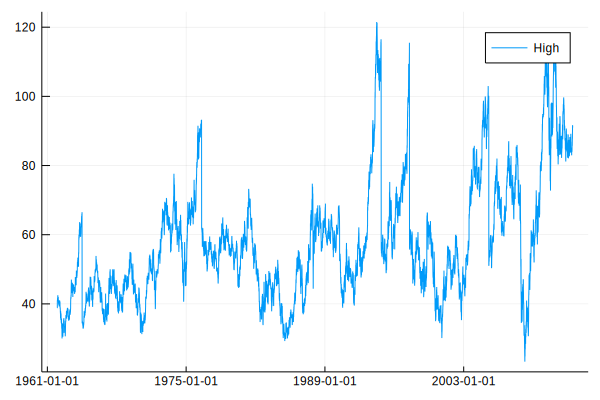

In [13]:
plot(MarketData.CAT.High)

In [31]:
fieldnames(typeof(ts))

(:timestamp, :values, :colnames, :meta)

In [32]:
timestamp(ts)[1:5]

5-element Array{Date,1}:
 2000-01-03
 2000-01-04
 2000-01-05
 2000-01-06
 2000-01-07

In [33]:
values(ts)[1:5, :]

5×4 Array{Float64,2}:
 104.88  112.5   101.69  111.94
 108.25  110.62  101.19  102.5 
 103.75  110.56  103.0   104.0 
 106.12  107.0    95.0    95.0 
  96.5   101.0    95.5    99.5 

In [34]:
colnames(ts)

4-element Array{Symbol,1}:
 :Open 
 :High 
 :Low  
 :Close

In [35]:
meta(MarketData.ts)

UndefVarError: UndefVarError: ts not defined

In [36]:
ts[Date(2000, 2, 2)]

1×4 TimeArray{Float64,2,Date,Array{Float64,2}} 2000-02-02 to 2000-02-02
│            │ Open   │ High   │ Low   │ Close │
├────────────┼────────┼────────┼───────┼───────┤
│ 2000-02-02 │ 100.75 │ 102.12 │ 97.0  │ 98.81 │

In [41]:
println(Dates.dayname(Dates.now()))
when(ts[1:70], Dates.dayname, "Wednesday")

Saturday


14×4 TimeArray{Float64,2,Date,Array{Float64,2}} 2000-01-05 to 2000-04-05
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-05 │ 103.75 │ 110.56 │ 103.0  │ 104.0  │
│ 2000-01-12 │ 95.0   │ 95.5   │ 86.5   │ 87.19  │
│ 2000-01-19 │ 105.62 │ 108.75 │ 103.38 │ 106.56 │
│ 2000-01-26 │ 110.0  │ 114.19 │ 109.75 │ 110.19 │
│ 2000-02-02 │ 100.75 │ 102.12 │ 97.0   │ 98.81  │
│ 2000-02-09 │ 114.12 │ 117.12 │ 112.44 │ 112.62 │
│ 2000-02-16 │ 117.75 │ 118.12 │ 112.12 │ 114.12 │
│ 2000-02-23 │ 113.23 │ 119.0  │ 111.0  │ 116.25 │
│ 2000-03-01 │ 118.56 │ 132.06 │ 118.5  │ 130.31 │
│ 2000-03-08 │ 122.88 │ 123.94 │ 118.56 │ 122.0  │
│ 2000-03-15 │ 115.62 │ 120.25 │ 114.12 │ 116.25 │
│ 2000-03-22 │ 132.78 │ 144.38 │ 131.56 │ 144.19 │
│ 2000-03-29 │ 139.38 │ 139.44 │ 133.83 │ 135.94 │
│ 2000-04-05 │ 126.47 │ 132.88 │ 124.0  │ 130.38 │

In [42]:
from(ts, Date(2000, 2, 2))

479×4 TimeArray{Float64,2,Date,Array{Float64,2}} 2000-02-02 to 2001-12-31
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-02-02 │ 100.75 │ 102.12 │ 97.0   │ 98.81  │
│ 2000-02-03 │ 100.31 │ 104.25 │ 100.25 │ 103.31 │
│ 2000-02-04 │ 103.94 │ 110.0  │ 103.62 │ 108.0  │
│ 2000-02-07 │ 108.0  │ 114.25 │ 105.94 │ 114.06 │
│ 2000-02-08 │ 114.0  │ 116.12 │ 111.25 │ 114.88 │
│ 2000-02-09 │ 114.12 │ 117.12 │ 112.44 │ 112.62 │
│ 2000-02-10 │ 112.88 │ 113.88 │ 110.0  │ 113.5  │
│ 2000-02-11 │ 113.62 │ 114.12 │ 108.25 │ 108.75 │
│ 2000-02-14 │ 109.31 │ 115.88 │ 108.62 │ 115.81 │
│ 2000-02-15 │ 115.25 │ 119.94 │ 115.19 │ 119.0  │
│ 2000-02-16 │ 117.75 │ 118.12 │ 112.12 │ 114.12 │
│ 2000-02-17 │ 115.19 │ 115.5  │ 113.12 │ 114.88 │
   ⋮
│ 2001-12-14 │ 20.73  │ 20.83  │ 20.09  │ 20.39  │
│ 2001-12-17 │ 20.4   │ 21.0   │ 20.19  │ 20.62  │
│ 2001-12-18 │ 20.89  │ 21.33  │ 20.22  │ 21.01  │
│ 2001-12-19 │ 20.58  │ 21.68  │ 20.47  │ 21.62  │
│ 2

In [43]:
to(ts, Date(2000, 2, 3))

23×4 TimeArray{Float64,2,Date,Array{Float64,2}} 2000-01-03 to 2000-02-03
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-03 │ 104.88 │ 112.5  │ 101.69 │ 111.94 │
│ 2000-01-04 │ 108.25 │ 110.62 │ 101.19 │ 102.5  │
│ 2000-01-05 │ 103.75 │ 110.56 │ 103.0  │ 104.0  │
│ 2000-01-06 │ 106.12 │ 107.0  │ 95.0   │ 95.0   │
│ 2000-01-07 │ 96.5   │ 101.0  │ 95.5   │ 99.5   │
│ 2000-01-10 │ 102.0  │ 102.25 │ 94.75  │ 97.75  │
│ 2000-01-11 │ 95.94  │ 99.38  │ 90.5   │ 92.75  │
│ 2000-01-12 │ 95.0   │ 95.5   │ 86.5   │ 87.19  │
│ 2000-01-13 │ 94.48  │ 98.75  │ 92.5   │ 96.75  │
│ 2000-01-14 │ 100.0  │ 102.25 │ 99.38  │ 100.44 │
│ 2000-01-18 │ 101.0  │ 106.0  │ 100.44 │ 103.94 │
│ 2000-01-19 │ 105.62 │ 108.75 │ 103.38 │ 106.56 │
│ 2000-01-20 │ 115.5  │ 121.5  │ 113.5  │ 113.5  │
│ 2000-01-21 │ 114.25 │ 114.25 │ 110.19 │ 111.31 │
│ 2000-01-24 │ 108.44 │ 112.75 │ 105.12 │ 106.25 │
│ 2000-01-25 │ 105.0  │ 113.12 │ 102.38 │ 112.25 │
│ 2000-01

In [50]:
findall(ts[:Close] .>= ts[:Open] .* 1.1)

7-element Array{Int64,1}:
  55
  74
 119
 254
 260
 271
 302

**findwhen** is the same as **findall** but for dates

In [51]:
findwhen(ts.Close .>= ts.Open .* 1.1)

7-element Array{Date,1}:
 2000-03-21
 2000-04-17
 2000-06-21
 2001-01-03
 2001-01-11
 2001-01-29
 2001-03-14

In [54]:
january = TimeArray(Date(2018, 1, 1): Day(1):Date(2018, 1, 31) |> collect, rand(31), [:values])

31×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2018-01-01 to 2018-01-31
│            │ values │
├────────────┼────────┤
│ 2018-01-01 │ 0.8848 │
│ 2018-01-02 │ 0.2764 │
│ 2018-01-03 │ 0.9129 │
│ 2018-01-04 │ 0.4756 │
│ 2018-01-05 │ 0.1583 │
│ 2018-01-06 │ 0.2637 │
│ 2018-01-07 │ 0.9952 │
│ 2018-01-08 │ 0.9279 │
│ 2018-01-09 │ 0.709  │
│ 2018-01-10 │ 0.1019 │
│ 2018-01-11 │ 0.6452 │
│ 2018-01-12 │ 0.0809 │
   ⋮
│ 2018-01-21 │ 0.8788 │
│ 2018-01-22 │ 0.5083 │
│ 2018-01-23 │ 0.2957 │
│ 2018-01-24 │ 0.5204 │
│ 2018-01-25 │ 0.0693 │
│ 2018-01-26 │ 0.7773 │
│ 2018-01-27 │ 0.3583 │
│ 2018-01-28 │ 0.773  │
│ 2018-01-29 │ 0.7851 │
│ 2018-01-30 │ 0.0098 │
│ 2018-01-31 │ 0.707  │

Collapse the data for January into a weekly period (**time function**) by keeping the last day of the period (**time filtering function**) and by computing the mean of the values (**value collapsing function**):

In [55]:
collapse(january, week, last, mean)

5×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2018-01-07 to 2018-01-31
│            │ values │
├────────────┼────────┤
│ 2018-01-07 │ 0.5667 │
│ 2018-01-14 │ 0.4588 │
│ 2018-01-21 │ 0.6431 │
│ 2018-01-28 │ 0.4718 │
│ 2018-01-31 │ 0.5006 │

In [56]:
map(january[1:7]) do ts, values 
    ts += Year(1) 
    (ts, values) 
end

7×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2019-01-01 to 2019-01-07
│            │ values │
├────────────┼────────┤
│ 2019-01-01 │ 0.8848 │
│ 2019-01-02 │ 0.2764 │
│ 2019-01-03 │ 0.9129 │
│ 2019-01-04 │ 0.4756 │
│ 2019-01-05 │ 0.1583 │
│ 2019-01-06 │ 0.2637 │
│ 2019-01-07 │ 0.9952 │